In [1]:
import sys
import os



import numpy as np
from SynthTempNetwork import Individual, SynthTempNetwork
from TemporalNetwork import ContTempNetwork, StaticTempNetwork
from FlowStability import SparseClustering, FlowIntegralClustering, run_multi_louvain, avg_norm_var_information
import parallel_clustering
import pickle

import matplotlib.pyplot as plt
import matplotlib

from scipy.sparse import (lil_matrix, dok_matrix, diags, eye, isspmatrix_csr, isspmatrix,
                          csr_matrix, coo_matrix, csc_matrix)
from scipy.sparse.linalg import eigsh

Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


In [2]:
net = ContTempNetwork.load('fig3_network')
net_heat = ContTempNetwork.load('fig3_network_heat')

In [3]:
lamdas2=list(np.logspace(-4,2,200))
lamdas1=list(np.logspace(-7,-4,100, endpoint=False))
lamdas = lamdas1 + lamdas2
between_lamdas=np.linspace(-7,2,300)

# Static Clustering

In [9]:
list_forw_flows = []

for i, l in enumerate(lamdas):
    with open(f'//scratch/tmp/180/skoove/experiment_static_weighted_heat/T/T{l:.06f}', 'rb') as f:
        T_list = pickle.load(f)['T']

    list_forw_flows.append(FlowIntegralClustering(T_list=T_list,
                                  time_list=net.times,
                                  verbose=False))
    
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [10]:
multi_res = {}

for i, lamda in enumerate(lamdas):
    flowintegralclustering = list_forw_flows[i]
    clustering = SparseClustering(p1=flowintegralclustering.p1, p2=None,
                        T=flowintegralclustering.T_list[-1], S=flowintegralclustering.I_list[0])
    clusters, stabilites, seeds = parallel_clustering.compute_parallel_clustering(clustering, num_repeat=50, nproc=10, 
                                verbose=False, n_meta_iter_max=1000, 
                                n_sub_iter_max=1000, 
                                clust_verbose=False, print_num_loops=False)
    multi_res[lamda] = clusters
    print(i)

file=f'//scratch/tmp/180/skoove/experiment_static_weighted_heat/clusters'
with open(file, 'wb') as fopen:
    pickle.dump(multi_res, fopen)

**** PID  3469419 starting pool of 10 processes for the clustering loop.


Exception ignored in: <function _releaseLock at 0x7fadda925360>
Traceback (most recent call last):
  File "/usr/lib/python3.10/logging/__init__.py", line 228, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 


**** PID **** PID **** PID **** PID  **** PID  **** PID **** PID **** PID 3724912**** PID   3724851   **** PID   3725033 3725319 starting clustering at3725105 372488637251423725265 3725218 starting clustering at 3725329   starting clustering at2024-01-08 18:39:11   starting clustering atstarting clustering atstarting clustering at starting clustering at starting clustering at   2024-01-08 18:39:11 2024-01-08 18:39:11starting clustering at 2024-01-08 18:39:112024-01-08 18:39:11 with seed 3931345591 2024-01-08 18:39:11 starting clustering at 2024-01-08 18:39:11   2024-01-08 18:39:11 with seed 2141922094  with seed 897940941
  with seed 4610932872024-01-08 18:39:11 with seed 867562636 
  
 with seed 3722257818
2024-01-08 18:39:11
 with seed 1657320861 with seed 3298725493
 with seed 3981468186
 
 with seed 1683365915

**** PID  **** PID 3725033**** PID **** PID **** PID      3725105372491237248513725319sym clust took 0.0732s, finished at    sym clust took 0.0760s, finished atsym clust too

Exception ignored in: <function _releaseLock at 0x7fadda925360>
Traceback (most recent call last):
  File "/usr/lib/python3.10/logging/__init__.py", line 228, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 


**** PID **** PID **** PID **** PID **** PID **** PID    **** PID   **** PID  3729896**** PID 3729920**** PID 3730028 3730174 3730010     372995337300993730131 3730168 starting clustering atstarting clustering at 3730066 starting clustering at   starting clustering at   starting clustering atstarting clustering atstarting clustering at2024-01-08 18:39:41starting clustering atstarting clustering at2024-01-08 18:39:412024-01-08 18:39:41 starting clustering at       2024-01-08 18:39:412024-01-08 18:39:41 with seed 412986902 with seed 22478820192024-01-08 18:39:41 with seed 40234666432024-01-08 18:39:41  2024-01-08 18:39:41


     with seed 1743567199 with seed 1794315642 with seed 1151544539 with seed 2199727435
2024-01-08 18:39:41
2024-01-08 18:39:41

    with seed 1392131699 with seed 2227166694
 with seed 4106846202

**** PID  **** PID 3730010**** PID **** PID     sym clust took 0.0647s, finished at3730168 3730028  **** PID 2024-01-08 18:39:41sym clust took 0.0620s, finished atsym clus

In [11]:
with open('//scratch/tmp/180/skoove/experiment_static_weighted_heat/clusters', 'rb') as f:
    multi_res_static_weighted_heat = pickle.load(f)
    
avg_csize_forw_static_weighted_heat = [np.mean([len(c) for c in \
                   multi_res_static_weighted_heat[lamda] if len(c)>1]) for lamda in lamdas]

NVI_forw_static_weighted_heat = [avg_norm_var_information(multi_res_static_weighted_heat[lamda]) for lamda in lamdas]

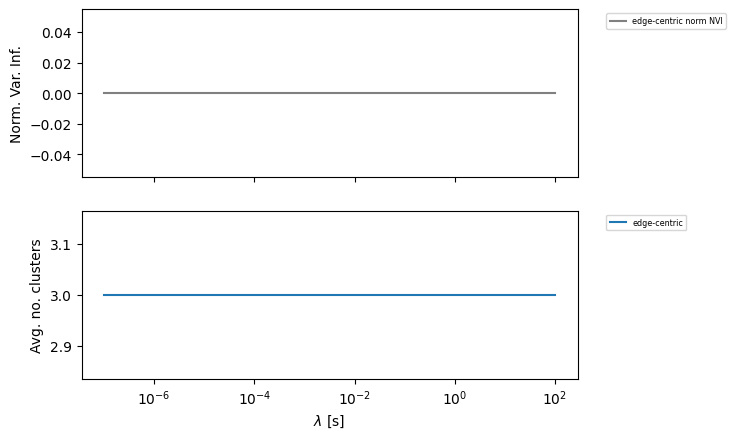

In [12]:
max_NVI = max(NVI_forw_static_weighted_heat)

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)

    
# ax1.plot(lamdas, NVI_forw_heat, 'black', label='node-centric norm NVI')
# ax1.vlines(x = [start_81, end_81, start_27, end_27, start_9, end_9, start_5, end_5],
#            ymin = [0, 0, 0, 0, 0, 0, 0, 0], ymax = [max_NVI, max_NVI, max_NVI, max_NVI, max_NVI, max_NVI, max_NVI, max_NVI], colors='purple')
ax1.plot(lamdas, NVI_forw_static_weighted_heat, 'grey', label='edge-centric norm NVI')

# ax2.plot(lamdas, avg_csize_forw, '-', label='node-centric')
# ax2.vlines(x = [start_81, end_81, start_27, end_27, start_9, end_9, start_5, end_5],
#            ymin = [0, 0, 0, 0, 0, 0, 0, 0], ymax = [81, 81, 81, 81, 81, 81, 81, 81], colors='purple')
ax2.plot(lamdas, avg_csize_forw_static_weighted_heat, '-', label='edge-centric')

ax1.set_xscale('log')
ax1.set_ylabel('Norm. Var. Inf.')
ax1.legend()
ax1.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))

ax2.set_xlabel(r'$\lambda$ [s]')
ax2.set_ylabel('Avg. no. clusters')
ax2.legend()
ax2.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))

In [16]:
with open('//scratch/tmp/180/skoove/experiment_heat/clusters', 'rb') as f:
    multi_res_heat_2 = pickle.load(f)

with open('//scratch/tmp/180/skoove/experiment_heat/clusters1', 'rb') as f:
    multi_res_heat_1 = pickle.load(f)
    
multi_res_heat = multi_res_heat_1 | multi_res_heat_2
    
avg_csize_forw_heat = [np.mean([len(c) for c in \
                   multi_res_heat[lamda] if len(c)>1]) for lamda in lamdas]

NVI_forw_heat = [avg_norm_var_information(multi_res_heat[lamda]) for lamda in lamdas]

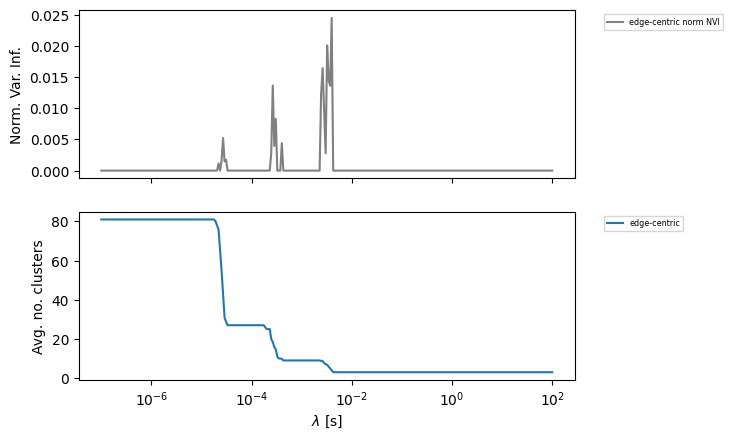

In [25]:
max_NVI = max(NVI_forw_heat)

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)

    
# ax1.plot(lamdas, NVI_forw_heat, 'black', label='node-centric norm NVI')
# ax1.vlines(x = [start_81, end_81, start_27, end_27, start_9, end_9, start_5, end_5],
#            ymin = [0, 0, 0, 0, 0, 0, 0, 0], ymax = [max_NVI, max_NVI, max_NVI, max_NVI, max_NVI, max_NVI, max_NVI, max_NVI], colors='purple')
ax1.plot(lamdas, NVI_forw_heat, 'grey', label='edge-centric norm NVI')

# ax2.plot(lamdas, avg_csize_forw, '-', label='node-centric')
# ax2.vlines(x = [start_81, end_81, start_27, end_27, start_9, end_9, start_5, end_5],
#            ymin = [0, 0, 0, 0, 0, 0, 0, 0], ymax = [81, 81, 81, 81, 81, 81, 81, 81], colors='purple')
ax2.plot(lamdas, avg_csize_forw_heat, '-', label='edge-centric')

ax1.set_xscale('log')
ax1.set_ylabel('Norm. Var. Inf.')
ax1.legend()
ax1.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))

ax2.set_xlabel(r'$\lambda$ [s]')
ax2.set_ylabel('Avg. no. clusters')
ax2.legend()
ax2.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))

# Derivatives

In [40]:
def derivative(v1, v2):
    assert len(v1) == len(v2), "Error: in order to compute the numerical derivative, the two varibales need to have the same lenght."
    derivative = []
    for i, vi in enumerate(v1[1:]):
        m1 =(vi - v1[i-1])/(v2[i]-v2[i-1])
        m2 =(v1[i+1] - vi)/(v2[i+1]-v2[i])
        derivative.append((m1+m2)/2)
    return derivative

In [41]:
# vNS_static_weighted_heat_end = []
# for i, lamda in enumerate(lamdas):
#     with open(f'//scratch/tmp/180/skoove/experiment_static_weighted_heat/vNSend/vNS{lamda:.06f}', 'rb') as f:
#         S = pickle.load(f)['vNS']
#         vNS_static_weighted_heat_end.append(S[list(S.keys())[0]][0])

vNS_heat_end = []
for i, lamda in enumerate(lamdas):
    with open(f'//scratch/tmp/180/skoove/experiment_heat/vNSend/vNS{lamda:.06f}', 'rb') as f:
        S = pickle.load(f)['vNS']
        vNS_heat_end.append(S[list(S.keys())[0]][0])

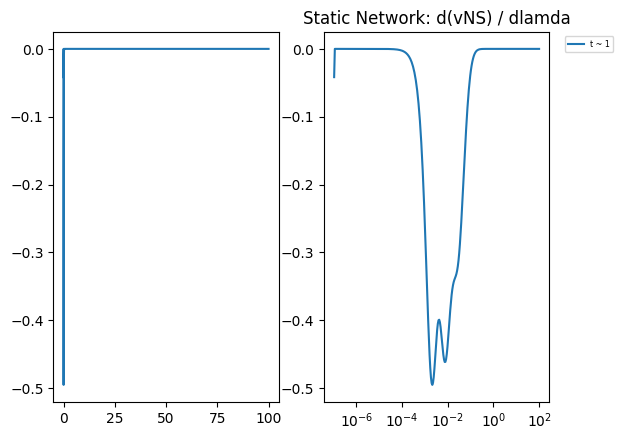

In [42]:
#v1 = vNS_static_weighted_heat_end
w1 = vNS_heat_end
v2 = between_lamdas
#ds_dt = derivative(v1, v2)
ds7_dt = derivative(w1, v2)

plt.subplot(1, 2, 1)
#plt.plot(lamdas[1:], ds_dt)
plt.plot(lamdas[1:], ds7_dt)

plt.subplot(1, 2, 2)
#plt.plot(lamdas[1:], ds_dt, label='t = net.times[0]')
plt.plot(lamdas[1:], ds7_dt, label='t ~ 1')
plt.xscale('log')
plt.title('Static Network: d(vNS) / dlamda')
plt.legend(fontsize='xx-small', loc='upper left', bbox_to_anchor=(1.05, 1))
#plt.savefig('./figures/fig3_recap_entropy_plots/fig3_dvNS_dlamda.eps', format='eps')

plt.show()

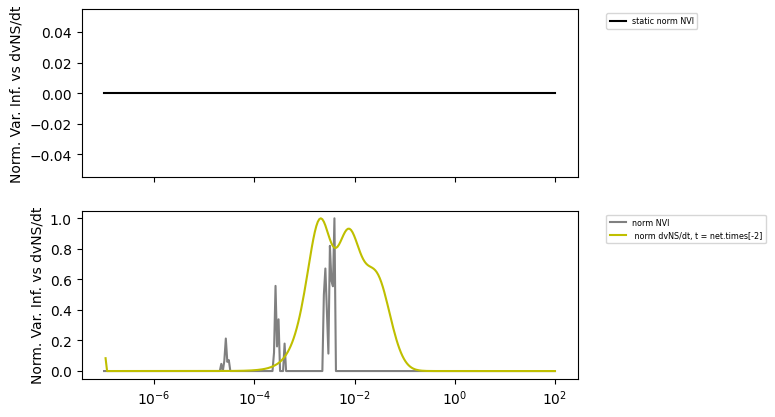

In [43]:
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)

    
ax1.plot(lamdas, NVI_forw_static_weighted_heat, 'black', label='static norm NVI')
#ax1.plot(lamdas[1:], ds_dt / min(ds_dt), 'y--', label=' norm dvNS/dt, t = net.times[-2]')
ax1.set_xscale('log')

ax1.set_ylabel('Norm. Var. Inf. vs dvNS/dt')
ax1.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))

ax2.plot(lamdas, NVI_forw_heat / max(NVI_forw_heat), 'grey', label='norm NVI')
ax2.plot(lamdas[1:], ds7_dt / min(ds7_dt), 'y', label=' norm dvNS/dt, t = net.times[-2]')
ax2.set_xscale('log')

ax2.set_ylabel('Norm. Var. Inf. vs dvNS/dt')
ax2.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))

In [27]:
with open(f'//scratch/tmp/180/skoove/experiment_static_weighted_heat/T/T0.110975', 'rb') as f:
        dict_T = pickle.load(f)

In [29]:
print(dict_T['T'][-1].toarray())

[[0.03703704 0.03703704 0.03703704 ... 0.         0.         0.        ]
 [0.03703704 0.03703704 0.03703704 ... 0.         0.         0.        ]
 [0.03703704 0.03703704 0.03703704 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.03703704 0.03703704 0.03703704]
 [0.         0.         0.         ... 0.03703704 0.03703704 0.03703704]
 [0.         0.         0.         ... 0.03703704 0.03703704 0.03703704]]
